In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['OMP_NUM_THREADS'] = '1'


# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data

import warnings
warnings.simplefilter("ignore", category=UserWarning)



In [147]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']



Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [148]:
data.dtypes

case_id                        object
patient_id                     object
aneurysmLocation               object
aneurysmType                   object
ruptureStatus                  object
age                             int64
sex                            object
multipleAneurysms                bool
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAn

In [149]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



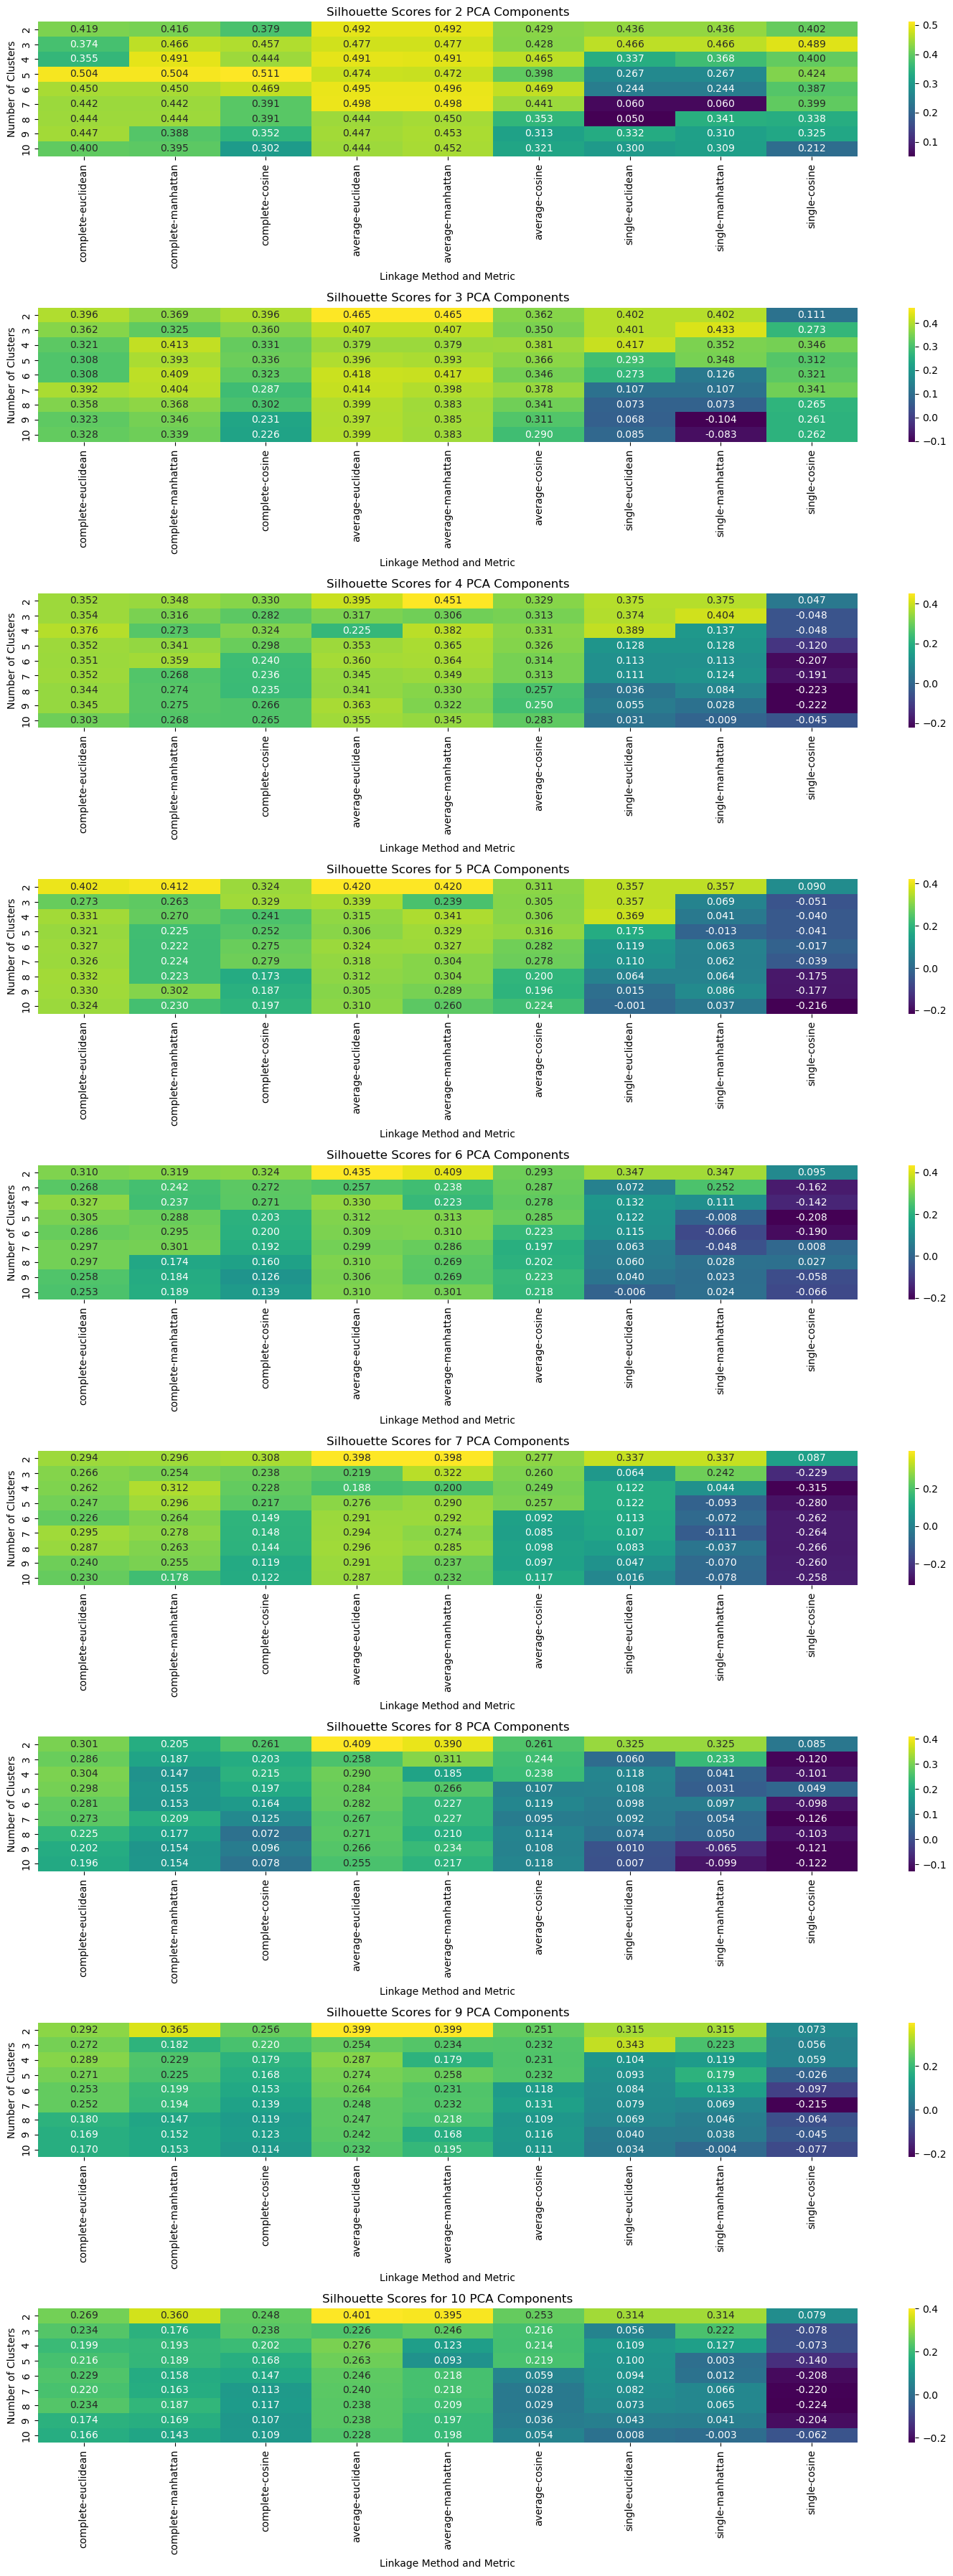

In [150]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



# Define the parameter grid
linkages = ['complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine']
n_clusters = range(2, 11)
n_pca_components = range(2, 11)

# Initialize the results dictionary for each PCA component count
pca_results = {}

# Perform PCA, Agglomerative Clustering, and Silhouette Scoring
for n_components in n_pca_components:
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    
    results = {}
    for linkage in linkages:
        for metric in distance_metrics:
            silhouette_scores = []
            for n in n_clusters:
                clustering = AgglomerativeClustering(n_clusters=n, linkage=linkage, metric=metric)
                cluster_labels = clustering.fit_predict(pca_data)
                silhouette_avg = silhouette_score(pca_data, cluster_labels)
                silhouette_scores.append(silhouette_avg)
            
            results[(linkage, metric)] = silhouette_scores

    pca_results[n_components] = pd.DataFrame(results, index=n_clusters)

# Plot heatmaps for each PCA component count
fig, axes = plt.subplots(len(n_pca_components), 1, figsize=(15, len(n_pca_components) * 4))

for i, n_components in enumerate(n_pca_components):
    sns.heatmap(pca_results[n_components], annot=True, fmt=".3f", cmap='viridis', ax=axes[i])
    axes[i].set_title(f'Silhouette Scores for {n_components} PCA Components')
    axes[i].set_xlabel('Linkage Method and Metric')
    axes[i].set_ylabel('Number of Clusters')

plt.tight_layout()
plt.show()

For n_clusters = 2, the average silhouette_score is 0.6854908762843417
For n_clusters = 3, the average silhouette_score is 0.5359100418596378
For n_clusters = 4, the average silhouette_score is 0.5378168421531726
For n_clusters = 5, the average silhouette_score is 0.4999442171433185
For n_clusters = 6, the average silhouette_score is 0.48000439224797964
For n_clusters = 7, the average silhouette_score is 0.31674935615509586
For n_clusters = 8, the average silhouette_score is 0.3434097174791286
For n_clusters = 9, the average silhouette_score is 0.3484512665983928
For n_clusters = 10, the average silhouette_score is 0.3310032714954656


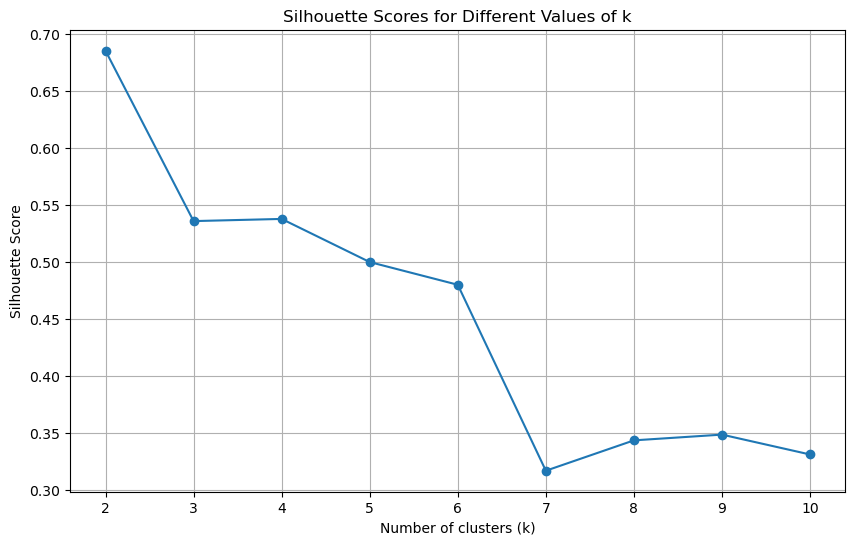

In [151]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [152]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example parameters to tune
perplexities = [5, 30, 50]
learning_rates = [10, 200, 1000]
n_iters = [250, 500, 1000]

# Store results for comparison
results = []

for p in perplexities:
    for lr in learning_rates:
        for n_iter in n_iters:
            tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(scaled_data)
            
            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
            clusters_tsne = kmeans_tsne.fit_predict(tsne_results)
            
            silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
            
            results.append((p, lr, n_iter, silhouette_tsne))
            print(f'Perplexity: {p}, Learning Rate: {lr}, n_iter: {n_iter}, Silhouette Score: {silhouette_tsne}')

# Find the best parameters
best_params = max(results, key=lambda x: x[3])
print(f'Best parameters: Perplexity: {best_params[0]}, Learning Rate: {best_params[1]}, n_iter: {best_params[2]}, Silhouette Score: {best_params[3]}')


Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261
Perplexity: 5, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5797255635261536
Perplexity: 5, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.6011251211166382
Perplexity: 5, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.4608520567417145
Perplexity: 5, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.49385496973991394
Perplexity: 5, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.47085511684417725
Perplexity: 5, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.7166614532470703
Perplexity: 5, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.6720711588859558
Perplexity: 5, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3176049590110779
Perplexity: 30, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5371966361999512
Perplexity: 30, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5371339917182922
Perplexity: 30, Learning Rate: 10, n_iter: 1000, Silhouette 

Silhouette Score (t-SNE with Optimal Parameters): 0.8571164011955261


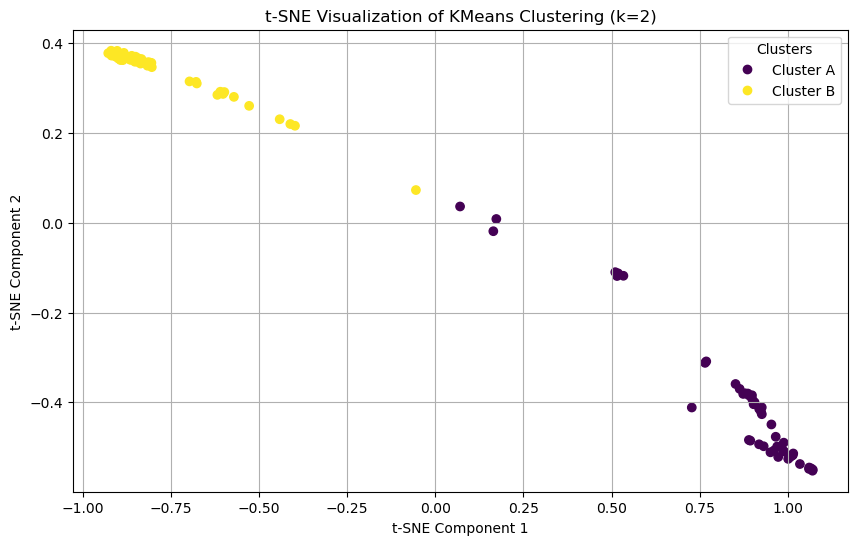

In [153]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply t-SNE with optimal parameters
tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, n_iter=250, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Reapply KMeans clustering with the results
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_results)

# Map numeric cluster labels to 'A' and 'B'
cluster_mapping = {0: 'A', 1: 'B'}
cluster_labels = [cluster_mapping[label] for label in clusters_tsne]

# Compute silhouette score on t-SNE results
silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
print(f'Silhouette Score (t-SNE with Optimal Parameters): {silhouette_tsne}')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add a colorbar with new cluster labels
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Cluster A', 'Cluster B'], title="Clusters")

plt.grid(True)
plt.show()


Calinski-Harasz Index (t-SNE with Optimal Parameters): 1473.5636198557445
Davies-Bouldin Score (t-SNE with Optimal Parameters): 0.1889385784830461


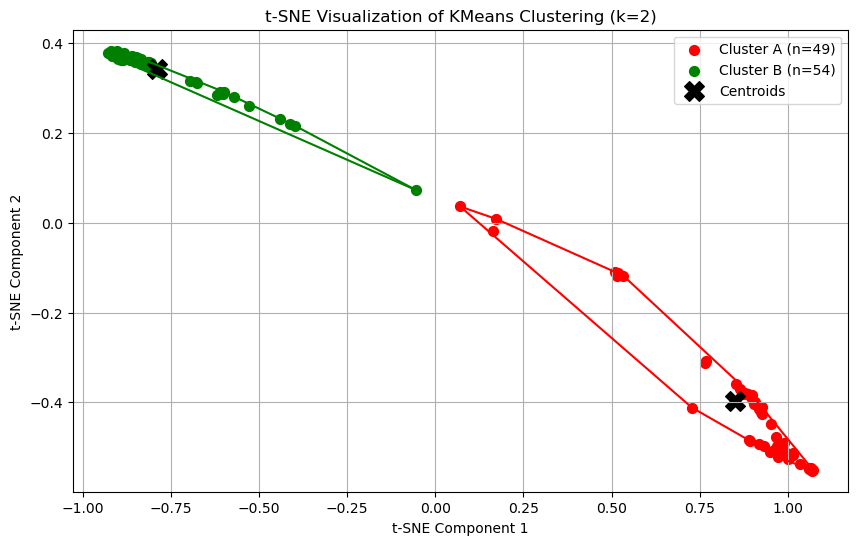

In [154]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from scipy.spatial import ConvexHull
import numpy as np

# Calculate Calinski-Harabasz Index (CSI)
csi_tsne = calinski_harabasz_score(tsne_results, clusters_tsne)
print(f'Calinski-Harasz Index (t-SNE with Optimal Parameters): {csi_tsne}')

# Calculate Davies-Bouldin Score
db_tsne = davies_bouldin_score(tsne_results, clusters_tsne)
print(f'Davies-Bouldin Score (t-SNE with Optimal Parameters): {db_tsne}')

# Plot the t-SNE results with centroids and convex hulls
plt.figure(figsize=(10, 6))
colors = ['red', 'green']

for cluster in range(2):
    cluster_data = tsne_results[clusters_tsne == cluster]
    count = np.sum(clusters_tsne == cluster)  # Count the number of data points in each cluster
    label = f'Cluster {cluster_mapping[cluster]} (n={count})'
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, s=50, color=colors[cluster])
    
    # Compute the convex hull for each cluster
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        for simplex in hull.simplices:
            plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], color=colors[cluster], linestyle='-', linewidth=1.5)

# Get the centroids in the reduced t-SNE space
centroids_tsne = kmeans_tsne.cluster_centers_
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [155]:
import numpy as np

# Re-run KMeans multiple times
n_runs = 10
stability_scores = []

for _ in range(n_runs):
    clusters_tsne = KMeans(n_clusters=2, random_state=np.random.randint(0, 10000)).fit_predict(tsne_results)
    silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
    stability_scores.append(silhouette_tsne)

print(f'Stability Scores: {stability_scores}')
print(f'Average Silhouette Score: {np.mean(stability_scores)}')
print(f'Standard Deviation of Silhouette Scores: {np.std(stability_scores)}')


Stability Scores: [0.8561941, 0.8561941, 0.8571164, 0.8571164, 0.8571164, 0.8561941, 0.8561941, 0.8571164, 0.8571164, 0.8561941]
Average Silhouette Score: 0.8566552400588989
Standard Deviation of Silhouette Scores: 0.00046116113662719727


In [156]:
import pandas as pd

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Calculate descriptive statistics
descriptive_stats = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust width to fit the content

# Display descriptive statistics
print(descriptive_stats)


               age                      sacVolume                        \
              mean        std min max        mean         std       min   
Cluster                                                                   
0        53.363636  13.811380  24  77  124.635181  149.120494  2.339496   
1        55.958333  13.756172  26  85  302.936329  355.700855  9.376307   

                     sacSurfaceArea                                     \
                 max           mean         std        min         max   
Cluster                                                                  
0         656.896755     105.106283   88.156064   7.333407  374.230654   
1        1312.025948     190.760851  160.702464  18.084625  625.717664   

          vdcVolume                                    vdcSurfaceArea  \
               mean         std       min          max           mean   
Cluster                                                                 
0        111.497397  137.558304  2

                       Feature  Mutual Information
26                   maxRadius            0.594054
24                  tortuosity            0.568559
27                maxCurvature            0.546560
21                  meanRadius            0.518813
22               meanCurvature            0.517162
18              vesselDiameter            0.499627
19             neckVesselAngle            0.201283
25                   minRadius            0.178008
20              sacVesselAngle            0.140840
30  bifurcationAngleOutOfPlane            0.127961
12      ostiumSectionPerimeter            0.110404
23                 meanTorsion            0.096600
28                  maxTorsion            0.079992
6              ellipsoidVolume            0.075899
15           ostiumShapeFactor            0.072237
29     bifurcationAngleInPlane            0.063273
0                          age            0.051931
1                    sacVolume            0.048785
8         ellipsoidMidSemiaxis 

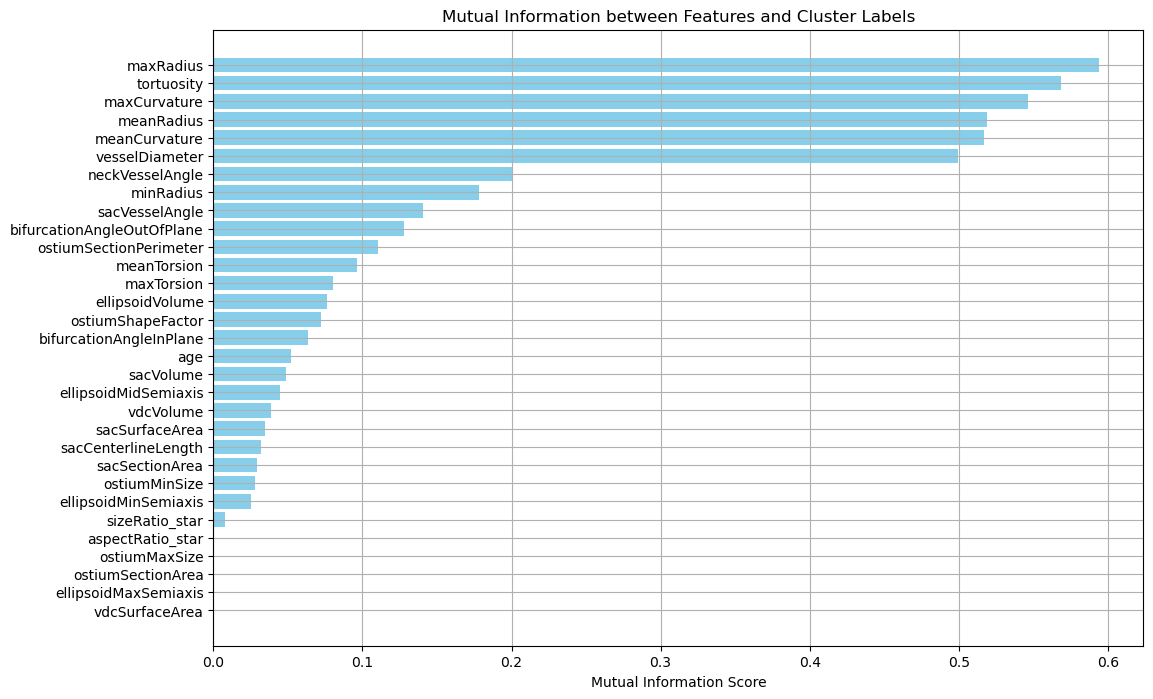

In [157]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cluster' is the column with cluster labels
# Define your list of feature column names (replace with actual feature names if needed)
features = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane'
]

# Extract features and the cluster labels
X = data[features]
y = data['Cluster']

# Calculate mutual information
mi = mutual_info_classif(X, y)

# Create a DataFrame to hold the results
mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mi})

# Sort the results by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display the results
print(mi_df)

# Plot the mutual information scores
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information between Features and Cluster Labels')
plt.gca().invert_yaxis()  # Highest scores at the top
plt.grid(True)
plt.show()


In [158]:
from scipy import stats
features = characteristics_with_rupture
# Initialize dictionaries to store test results
t_test_results = {}
mann_whitney_results = {}

for feature in features:
    cluster_0 = data[data['Cluster'] == 0][feature]
    cluster_1 = data[data['Cluster'] == 1][feature]

    # Check normality with Shapiro-Wilk test
    _, p_value_shapiro_0 = stats.shapiro(cluster_0)
    _, p_value_shapiro_1 = stats.shapiro(cluster_1)

    # Perform t-test or Mann-Whitney U test based on normality
    if p_value_shapiro_0 > 0.05 and p_value_shapiro_1 > 0.05:
        t_stat, p_value = stats.ttest_ind(cluster_0, cluster_1)
        t_test_results[feature] = p_value
    else:
        u_stat, p_value = stats.mannwhitneyu(cluster_0, cluster_1)
        mann_whitney_results[feature] = p_value

# Print results
print("T-Test Results:")
for feature, p_value in t_test_results.items():
    print(f'{feature}: p-value = {p_value}')

print("\nMann-Whitney U Test Results:")
for feature, p_value in mann_whitney_results.items():
    print(f'{feature}: p-value = {p_value}')


T-Test Results:
age: p-value = 0.3429230775705858
meanRadius: p-value = 8.655578037905032e-29
minRadius: p-value = 5.027230168704359e-10

Mann-Whitney U Test Results:
sacVolume: p-value = 0.0011040892584576838
sacSurfaceArea: p-value = 0.0012400278865008728
vdcVolume: p-value = 0.0006543887452650352
vdcSurfaceArea: p-value = 0.0007035930512655125
sacSectionArea: p-value = 0.0039050252928790386
ellipsoidVolume: p-value = 0.000593730987276819
ellipsoidMaxSemiaxis: p-value = 0.0023831471579862963
ellipsoidMidSemiaxis: p-value = 0.0004878308781459587
ellipsoidMinSemiaxis: p-value = 0.0012399894330470597
sacCenterlineLength: p-value = 0.0011567204926357006
ostiumSectionArea: p-value = 0.007059752157791759
ostiumSectionPerimeter: p-value = 0.011233608061994832
ostiumMinSize: p-value = 0.0025448662106590378
ostiumMaxSize: p-value = 0.014843271215236676
ostiumShapeFactor: p-value = 0.03410322356641969
aspectRatio_star: p-value = 0.3633381882359644
sizeRatio_star: p-value = 0.017469190920284657

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cluster' is the column with cluster labels

# Calculate the size of each cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Display the cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    55
1    48
Name: count, dtype: int64


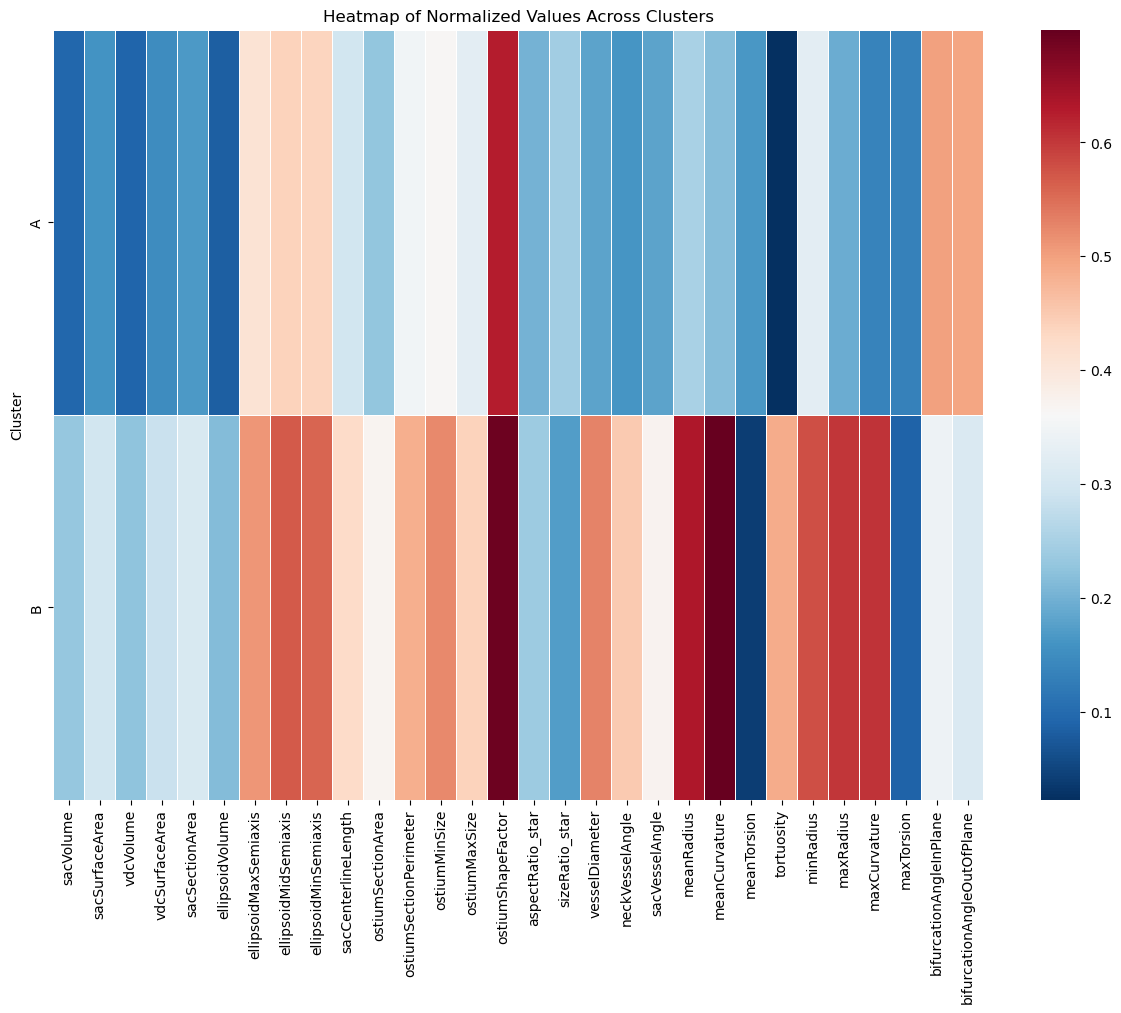

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = ['sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Normalize the numerical variables
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the normalized data
data_normalized['Cluster'] = data['Cluster']

# Map the cluster numbers to Cluster A and Cluster B
cluster_mapping = {0: 'A', 1: 'B'}
data_normalized['Cluster'] = data_normalized['Cluster'].map(cluster_mapping)

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, cmap='RdBu_r', annot=False, linewidths=.5)
plt.title('Heatmap of Normalized Values Across Clusters')
plt.show()


In [161]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = [ 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea', 'ellipsoidVolume', 'sacVolume', 'sacSurfaceArea', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Normalize the numerical variables
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the normalized data
data_normalized['Cluster'] = data['Cluster']

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Convert the aggregated DataFrame into a tabular format for display
cluster_means_table = cluster_means.T  # Transpose to get clusters as columns and variables as rows

# Display the table
cluster_means_table_display = cluster_means_table.round(3)  # Round to 3 decimal places for readability
print(cluster_means_table_display)


Cluster                         0      1
ellipsoidMaxSemiaxis        0.409  0.510
ellipsoidMidSemiaxis        0.439  0.570
ellipsoidMinSemiaxis        0.435  0.557
vdcVolume                   0.090  0.224
vdcSurfaceArea              0.149  0.287
sacSectionArea              0.168  0.306
ellipsoidVolume             0.084  0.213
sacVolume                   0.093  0.230
sacSurfaceArea              0.158  0.297
sacCenterlineLength         0.295  0.426
ostiumSectionArea           0.227  0.371
ostiumSectionPerimeter      0.350  0.484
ostiumMinSize               0.366  0.525
ostiumMaxSize               0.324  0.440
ostiumShapeFactor           0.626  0.691
aspectRatio_star            0.201  0.238
sizeRatio_star              0.244  0.171
vesselDiameter              0.180  0.529
neckVesselAngle             0.162  0.449
sacVesselAngle              0.181  0.374
meanRadius                  0.250  0.633
meanCurvature               0.218  0.699
meanTorsion                 0.165  0.040
tortuosity      

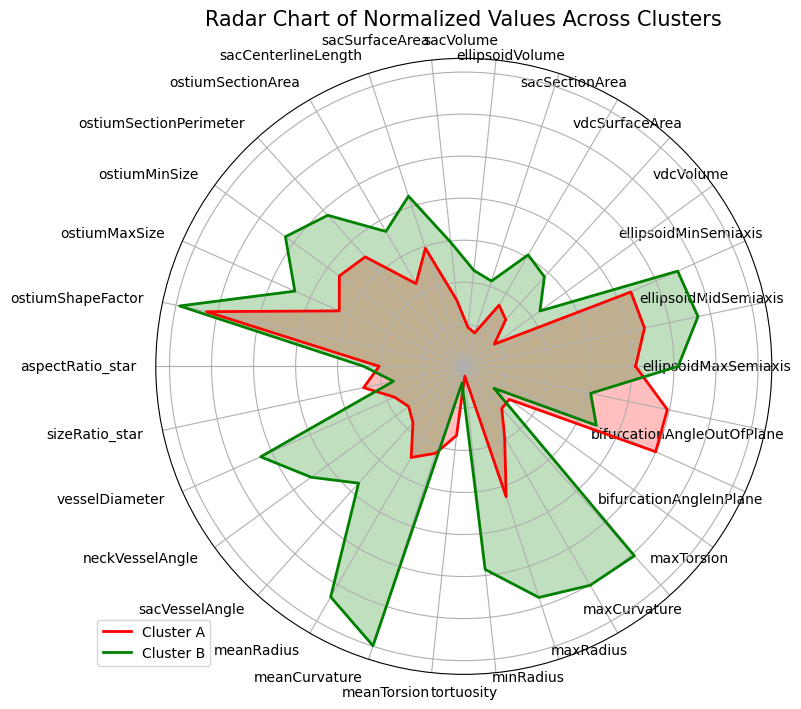

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the data for the radar chart
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Map the cluster numbers to "Cluster A" and "Cluster B"
cluster_mapping = {0: 'A', 1: 'B'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

data_normalized['Cluster'] = data['Cluster']

# Calculate the mean for each cluster
cluster_means = data_normalized.groupby('Cluster').mean()

# Radar chart preparation
labels = cluster_means.columns.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set colors for clusters
colors = {'A': 'red', 'B': 'green'}

for i, (index, row) in enumerate(cluster_means.iterrows()):
    data = row.tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle='solid', color=colors[index], label=f'Cluster {index}')
    ax.fill(angles, data, color=colors[index], alpha=0.25)

# Remove y-ticks and adjust x-tick labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])

# Adjust the label position to avoid overlap
ax.set_xticklabels(labels, size=10, ha='right', rotation=45)

plt.title('Radar Chart of Normalized Values Across Clusters', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


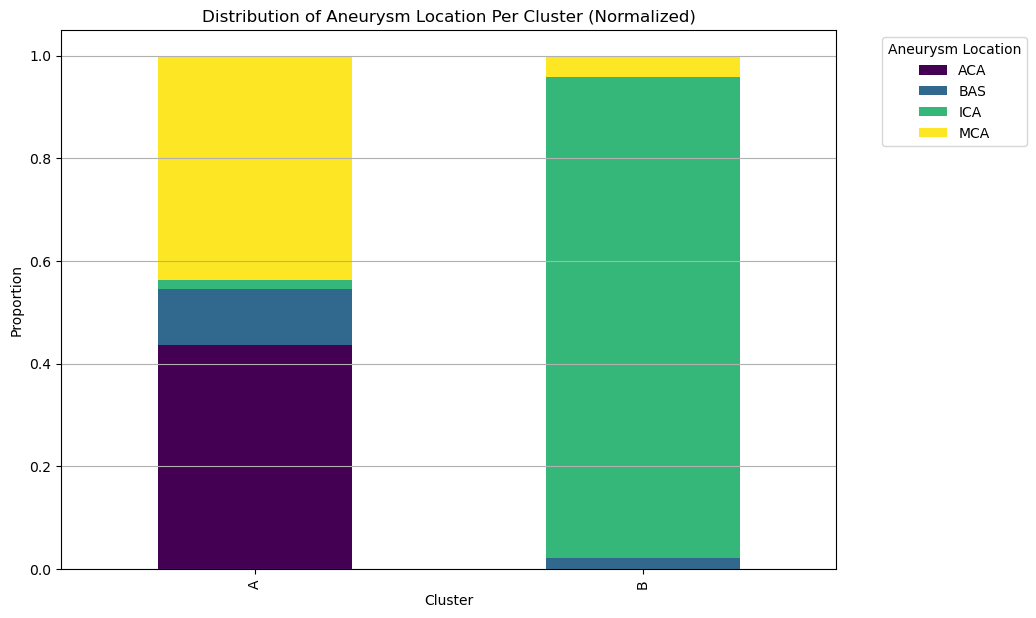

aneurysmLocation       ACA       BAS       ICA       MCA
Cluster                                                 
A                 0.436364  0.109091  0.018182  0.436364
B                 0.000000  0.020833  0.937500  0.041667
Chi-square test for ACA: p-value = 5.971119665212249e-07
Chi-square test for BAS: p-value = 0.16667808537920964
Chi-square test for ICA: p-value = 5.030023616509555e-20
Chi-square test for MCA: p-value = 1.2277927757111701e-05


In [163]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = "Merged_Aneurysm.csv"
data = pd.read_csv(file_path)

# Define your list of feature column names (replace with actual feature names if needed)
features = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane'
]

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Map the cluster numbers to Cluster A and Cluster B
cluster_mapping = {0: 'A', 1: 'B'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Group by cluster and aneurysm location, then normalize within each cluster
location_distribution = data.groupby(['Cluster', 'aneurysmLocation']).size().unstack(fill_value=0)
location_distribution = location_distribution.div(location_distribution.sum(axis=1), axis=0)

# Plot a stacked bar chart
ax = location_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

# Add labels and title
plt.title('Distribution of Aneurysm Location Per Cluster (Normalized)')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Aneurysm Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.show()

print(location_distribution)

# Chi-square test for statistical significance within each aneurysm location across clusters
for location in location_distribution.columns:
    contingency_table = pd.crosstab(data['Cluster'], data['aneurysmLocation'] == location)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f'Chi-square test for {location}: p-value = {p_value}')


Frequency Distribution of ruptureStatus Across Clusters (%):
Cluster                A      B
ruptureStatus                  
R              52.727273  31.25
U              47.272727  68.75




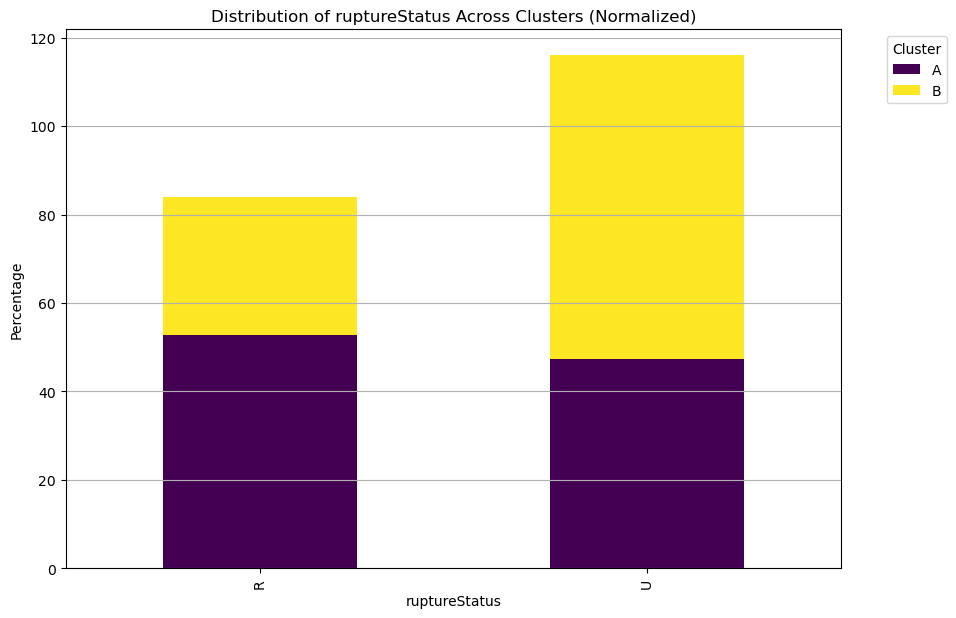

Frequency Distribution of aneurysmType Across Clusters (%):
Cluster           A          B
aneurysmType                  
LAT             0.0  83.333333
TER           100.0  16.666667




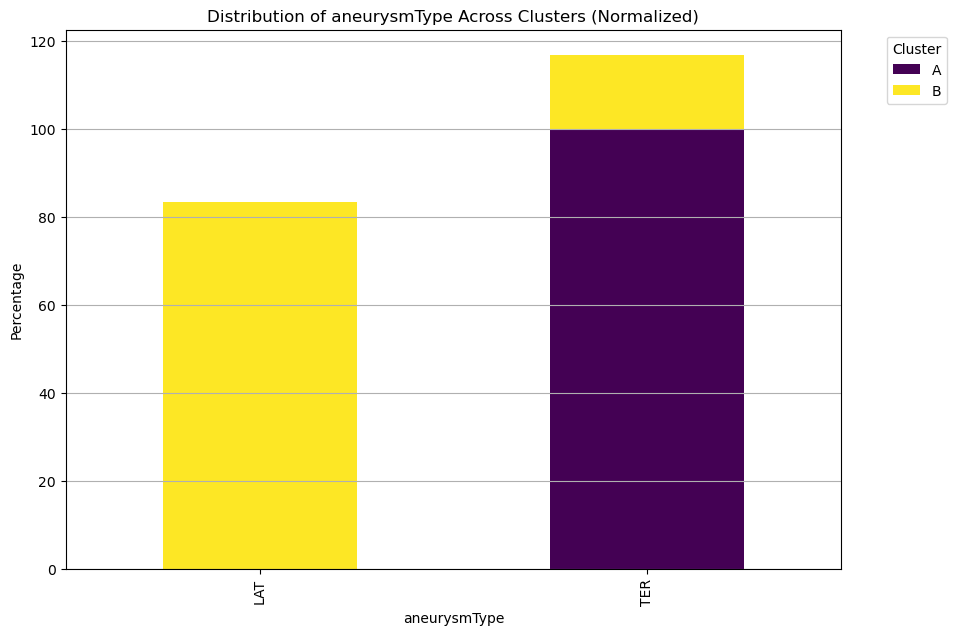

Frequency Distribution of multipleAneurysms Across Clusters (%):
Cluster                    A      B
multipleAneurysms                  
False              85.454545  81.25
True               14.545455  18.75




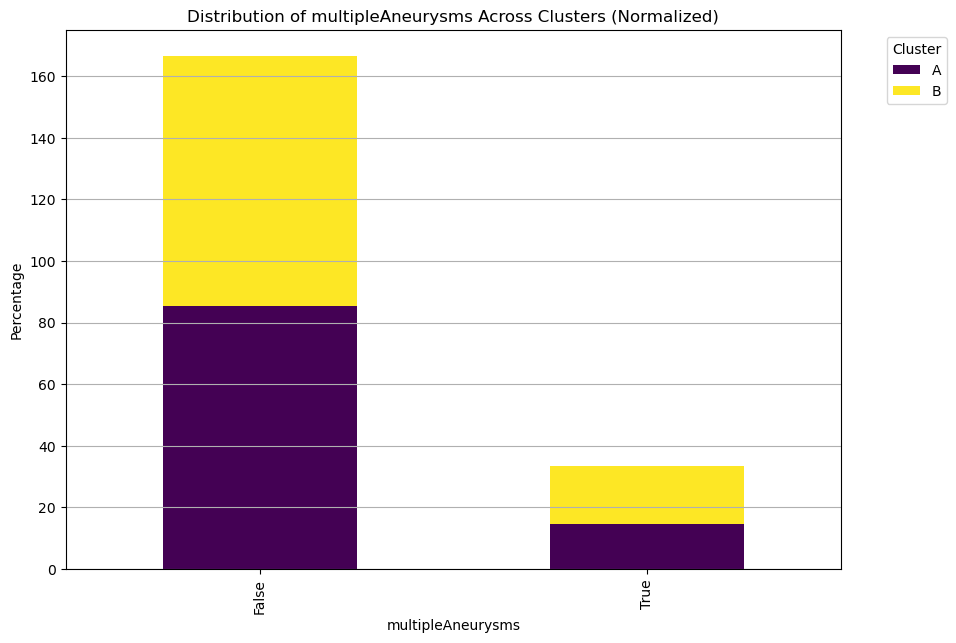

Frequency Distribution of sex Across Clusters (%):
Cluster          A          B
sex                          
F        45.454545  83.333333
M        54.545455  16.666667




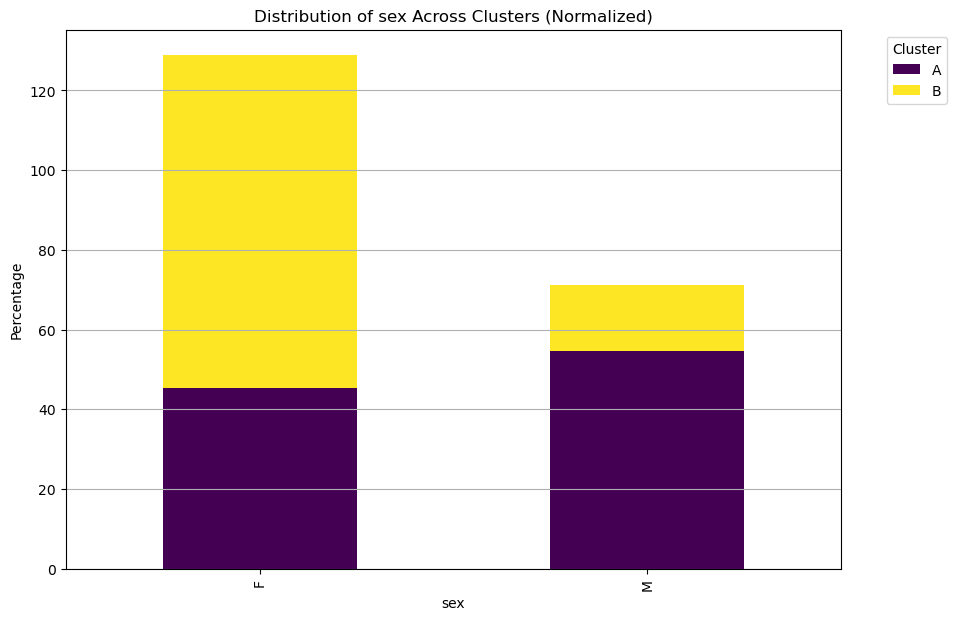

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Cluster' labels and the categorical features mentioned

# List of categorical features to analyze
categorical_features = ['ruptureStatus', 'aneurysmType', 'multipleAneurysms', 'sex']

# Loop through each categorical feature and create frequency tables and visualizations
for feature in categorical_features:
    # Create a crosstab (frequency table) for the feature across clusters
    crosstab = pd.crosstab(data[feature], data['Cluster'], normalize='columns') * 100
    
    # Display the crosstab
    print(f"Frequency Distribution of {feature} Across Clusters (%):")
    print(crosstab)
    print("\n")
    
    # Plot a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title(f'Distribution of {feature} Across Clusters (Normalized)')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()
